# 1 - Calcular u = exp(-i.h.t)
Vou escolher t = 1. e fixar os parametros da hamiltoniana no default.

In [1]:
import DPQNova
import numpy as np

In [2]:
dpq = DPQNova.DinamicaPontosQuanticos(j_1_inicial= 10, j_1_final= 10, passoJ_1 = 0.5,
                                      j_2_inicial= 10, j_2_final= 10, passoJ_2 = 0.5,
                                      bz_1_inicial= 0.1, bz_1_final= 10, passoBz_1 = 0.1,
                                      bz_2_inicial= 0.1, bz_2_final= 10, passoBz_2 = 0.1,
                                      j_12_inicial= 0.02, j_12_final= 2, passoJ_12 = 0.02,
                                      tInicial=1, tFinal=20, passoT=1)

In [3]:
dpq = DPQNova.DinamicaPontosQuanticos()

In [4]:
h = dpq.hamiltoniana(j_1=10, j_2=10, bz_1=10, bz_2=10, j_12=10)
print("Matrix h:\n",h)

Matrix h:
 [[ 7.5  5.   5.   0. ]
 [ 5.  -2.5  0.   5. ]
 [ 5.   0.  -2.5  5. ]
 [ 0.   5.   5.  -2.5]]


In [5]:
u = dpq.u(t=1, h=h)
print("Matrix u:\n",u)

Matrix u:
 [[ 0.58086494+0.01245317j  0.24215717+0.45677366j  0.24215717+0.45677366j
   0.16964455+0.3147968j ]
 [ 0.24215717+0.45677366j -0.26747423+0.0060874j   0.53366938-0.59238475j
   0.07251262+0.14197686j]
 [ 0.24215717+0.45677366j  0.53366938-0.59238475j -0.26747423+0.0060874j
   0.07251262+0.14197686j]
 [ 0.16964455+0.3147968j   0.07251262+0.14197686j  0.07251262+0.14197686j
   0.0965506 -0.90109415j]]


# 2 - Calcular u = exp(-i.h.dt)

Gostariamos de provar que u= exp(-i.h.t)= exp(-i.h.dt), onde dt= t1+t2+t3....

In [6]:
#dt = np.linspace(0.1, 1, num=100, endpoint=True, retstep=False, dtype=None, axis=0)
#print("Tempos:\n",dt)
t=0.1
n = 1
dt =t/n
print(dt)

0.1


In [7]:
result = dpq.u(dt, h)
for n_ in range(n-1):
    result = result@dpq.u(dt, h)

In [8]:
print(result)

[[ 0.52850871-0.58786927j -0.10893205-0.38822403j -0.10893205-0.38822403j
  -0.22262225+0.01895816j]
 [-0.10893205-0.38822403j  0.74633149+0.22747045j -0.22258093-0.01993351j
   0.11369021-0.40718219j]
 [-0.10893205-0.38822403j -0.22258093-0.01993351j  0.74633149+0.22747045j
   0.11369021-0.40718219j]
 [-0.22262225+0.01895816j  0.11369021-0.40718219j  0.11369021-0.40718219j
   0.74637281+0.18857879j]]


# 3- dividindo em partes

In [9]:
h1,h2,h3,h4,h5 = dpq.hamiltoniana_p(j_1=10, j_2=10, bz_1=10, bz_2=10, j_12=10)

In [10]:
h1

array([[ 5.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.],
       [ 0.,  0., -5., -0.],
       [ 0.,  0., -0., -5.]])

In [11]:
h2

array([[ 5.,  0.,  0.,  0.],
       [ 0., -5.,  0., -0.],
       [ 0.,  0.,  5.,  0.],
       [ 0., -0.,  0., -5.]])

In [12]:
h3

array([[-2.5,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  0. ],
       [ 0. ,  0. , -2.5,  0. ],
       [ 0. ,  0. ,  0. ,  7.5]])

In [13]:
h4

array([[0., 0., 5., 0.],
       [0., 0., 0., 5.],
       [5., 0., 0., 0.],
       [0., 5., 0., 0.]])

In [14]:
h5

array([[0., 5., 0., 0.],
       [5., 0., 0., 0.],
       [0., 0., 0., 5.],
       [0., 0., 5., 0.]])

In [15]:
t=0.1
n = 2
dt =t/n
#print(dt)
result = dpq.u(dt, h1)@dpq.u(dt, h2)@dpq.u(dt, h3)@dpq.u(dt, h4)@dpq.u(dt, h5)
for n_ in range(n-1):
    result = result@dpq.u(dt, h1)@dpq.u(dt, h2)@dpq.u(dt, h3)@dpq.u(dt, h4)@dpq.u(dt, h5)


In [16]:
print(result)

[[ 0.53713701-0.5732422j  -0.20181194-0.354271j   -0.20181194-0.354271j
  -0.20907201+0.08181761j]
 [-0.00726007-0.40765584j  0.74620902+0.2189712j  -0.2227034 -0.02843276j
   0.1113517 -0.40765584j]
 [-0.00726007-0.40765584j -0.2227034 -0.02843276j  0.74620902+0.2189712j
   0.1113517 -0.40765584j]
 [-0.2227034 -0.02843276j  0.1113517 -0.40765584j  0.1113517 -0.40765584j
   0.74620902+0.18868464j]]


# 4- Fazer o de segunda ordem

-Para tentar diminuir o numero de operações logicas

In [17]:
hs = list(dpq.hamiltoniana_p(j_1=10, j_2=10, bz_1=10, bz_2=10, j_12=10))
hs_2 = hs.copy()
hs_2.reverse()

In [18]:
print(hs)
print(hs_2)

[array([[ 5.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.],
       [ 0.,  0., -5., -0.],
       [ 0.,  0., -0., -5.]]), array([[ 5.,  0.,  0.,  0.],
       [ 0., -5.,  0., -0.],
       [ 0.,  0.,  5.,  0.],
       [ 0., -0.,  0., -5.]]), array([[-2.5,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  0. ],
       [ 0. ,  0. , -2.5,  0. ],
       [ 0. ,  0. ,  0. ,  7.5]]), array([[0., 0., 5., 0.],
       [0., 0., 0., 5.],
       [5., 0., 0., 0.],
       [0., 5., 0., 0.]]), array([[0., 5., 0., 0.],
       [5., 0., 0., 0.],
       [0., 0., 0., 5.],
       [0., 0., 5., 0.]])]
[array([[0., 5., 0., 0.],
       [5., 0., 0., 0.],
       [0., 0., 0., 5.],
       [0., 0., 5., 0.]]), array([[0., 0., 5., 0.],
       [0., 0., 0., 5.],
       [5., 0., 0., 0.],
       [0., 5., 0., 0.]]), array([[-2.5,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  0. ],
       [ 0. ,  0. , -2.5,  0. ],
       [ 0. ,  0. ,  0. ,  7.5]]), array([[ 5.,  0.,  0.,  0.],
       [ 0., -5.,  0., -0.],
       [ 0.,  0.,  5.,  0.],

In [19]:
def second(t=1):
    hs = list(dpq.hamiltoniana_p(j_1=10, j_2=10, bz_1=10, bz_2=10, j_12=10))
    hs_2 = hs.copy()
    hs_2.reverse()
    n = 100
    dt =t/(2*n)
    result_ = np.identity(4)
    result_r = np.identity(4)
    result_total = np.identity(4)
    for n_ in range(n):
        for h_ in hs:
            result_ = result_@dpq.u(dt, h_)
        for h_r in hs_2:
            result_r = result_r@dpq.u(dt, h_r)
        aux = result_@result_r
        
        result_ = np.identity(4)
        result_r = np.identity(4)
        result_total = result_total@aux
    return result_total


second()

array([[ 0.57920344+0.01315955j,  0.24225416+0.4576492j ,
         0.24225416+0.4576492j ,  0.16960086+0.3151603j ],
       [ 0.24225416+0.4576492j , -0.26792409+0.0066941j ,
         0.53321952-0.59177804j,  0.0725625 +0.14231083j],
       [ 0.24225416+0.4576492j ,  0.53321952-0.59177804j,
        -0.26792409+0.0066941j ,  0.0725625 +0.14231083j],
       [ 0.16960086+0.3151603j ,  0.0725625 +0.14231083j,
         0.0725625 +0.14231083j,  0.09530064-0.90099498j]])

# 5- Quarta Ordem

In [20]:
hs = list(dpq.hamiltoniana_p(j_1=10, j_2=10, bz_1=10, bz_2=10, j_12=10))
hs_2 = hs.copy()
hs_2.reverse()
def second(t=0.1):

    n = 2
    dt =t/(2*n)
    result_ = np.identity(4)
    result_r = np.identity(4)
    result_total = np.identity(4)
    for n_ in range(n):
        for h_ in hs:
            result_ = result_@dpq.u(dt, h_)
        for h_r in hs_2:
            result_r = result_r@dpq.u(dt, h_r)
        aux = result_@result_r
        result_ = np.identity(4)
        result_r = np.identity(4)
        result_total = result_total@aux
    return result_total

def forth(t=1):
    s_2 = (4-4**(1/3))**(-1)
    return (np.linalg.matrix_power(second(s_2*t),2))@second((1-(4*s_2))*t)@(np.linalg.matrix_power(second(s_2*t),2))

print(forth())    

[[-0.08023622-0.25959976j -0.20301706+0.19489471j -0.20301706+0.19489471j
   0.45223244+0.75050396j]
 [-0.20301706+0.19489471j -0.35831496-0.11801655j  0.44282865-0.7164887j
   0.20881545+0.15945359j]
 [-0.20301706+0.19489471j  0.44282865-0.7164887j  -0.35831496-0.11801655j
   0.20881545+0.15945359j]
 [ 0.45223244+0.75050396j  0.20881545+0.15945359j  0.20881545+0.15945359j
   0.06250803+0.30043917j]]


In [21]:
s_2 = (4-4**(1/3))**(-1)
s_2

0.4144907717943757

In [22]:
print("result:\n",result_total)

NameError: name 'result_total' is not defined

### segunda ordem para conferencia 

In [23]:
#Hamiltoniana
hs = list(dpq.hamiltoniana_p(j_1=10, j_2=10, bz_1=10, bz_2=10, j_12=10))
#Reverte hamiltoniana
hs_2 = hs.copy()
hs_2.reverse()
#seta os  parametros
t=1
n = 10000
dt =t/(2*n)
print(dt)
#Inicializa resultados
result_ = np.identity(4)
result_r = np.identity(4)
result_total = np.identity(4)

#calcula com a hamiltoniana
for h_ in hs:
    result_ = result_@dpq.u(dt, h_)
#calcula com a hamiltoniana reversa
for h_r in hs_2:
    result_r = result_r@dpq.u(dt, h_r)
#Calculo da exp. com o resultado final    
aux = result_@result_r
result_total = np.linalg.matrix_power(aux,n)

        

5e-05


In [25]:
len(hs)

5

In [23]:
print("result:\n",result_total)

result:
 [[ 0.58086494+0.01245317j  0.24215717+0.45677366j  0.24215717+0.45677366j
   0.16964455+0.3147968j ]
 [ 0.24215717+0.45677366j -0.26747423+0.0060874j   0.53366938-0.59238475j
   0.07251262+0.14197686j]
 [ 0.24215717+0.45677366j  0.53366938-0.59238475j -0.26747423+0.0060874j
   0.07251262+0.14197686j]
 [ 0.16964455+0.3147968j   0.07251262+0.14197686j  0.07251262+0.14197686j
   0.0965506 -0.90109415j]]


# 6- Generalização do Método e Gráficos

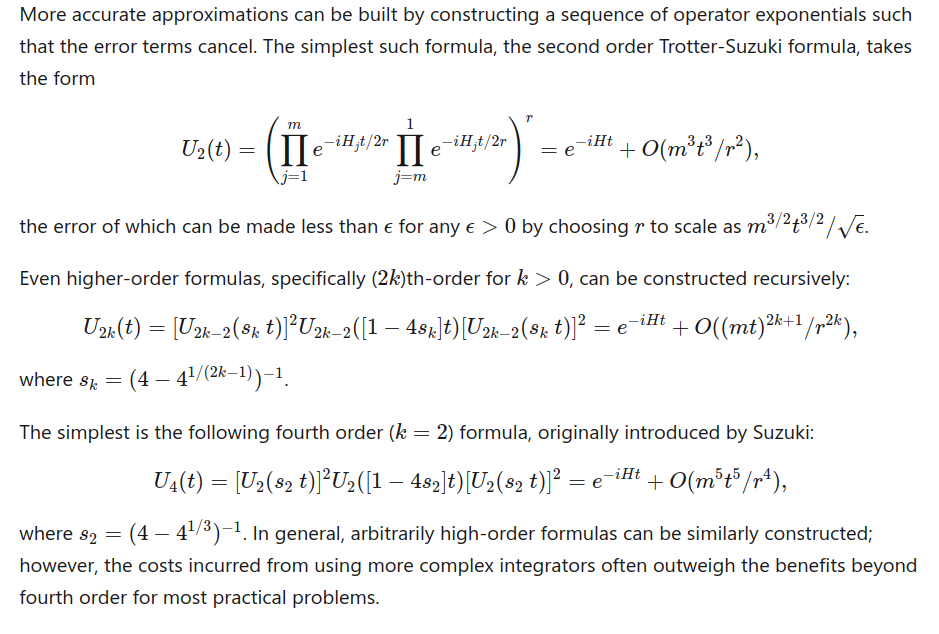

#### A seguir vamos aplicar a generalização para (2k)th-ordem para k>0. 

In [146]:
import dask
#Definindo Sk
def s(k):
    return (4-(4**(1/(2*k-1))))**(-1)

#Definindo implementação de segunda ordem usada como base.
def ordem2(t):
    n = 10000
    dt =t/(2*n)
    result_ = np.identity(4)
    result_r = np.identity(4)
    result_total = np.identity(4)
    for n_ in range(n):
        for h_ in hs:
            result_ = result_@dpq.u(dt, h_)
        for h_r in hs_2:
            result_r = result_r@dpq.u(dt, h_r)
        aux = result_@result_r
        result_ = np.identity(4)
        result_r = np.identity(4)
        result_total = result_total@aux
    return result_total

#Implementação respeitando o carater recursivo.
#Função Principal k-ordem
def trotter_ordem(k, t):
    #Prepara Sk's
    sk = s(k)
    #Caso k=2 calcula o ordem2
    if 2*k==2:
        return dask.delayed(ordem2)(t)
    else:
        t_1 = trotter_ordem(((2*k)-2),sk*t)**2
        t_2 = trotter_ordem(((2*k)-2), (1-(4*sk)*t))
        resultado_final = t_1*t_2*t_1
    return resultado_final


In [147]:
trotter_ordem(2,1)

RecursionError: maximum recursion depth exceeded

In [126]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(10000)


3000


In [99]:
from functools import reduce

def s(k):
    return (4-(4**(1/(2*k-1))))**(-1)

def trotter_ordem(k,t):
    #Constroi a lista de sk's
    sk_l = [s(n) for n in range(2,k+1)]
    #Multiplica todos elementos da lista
    sk = reduce((lambda x, y: x * y), sk_l)
    #A formula de trotter foi dividida em 3 partes: t_1, t_2, t_3
    t_1 = ordem2(sk_l[0]*)
    
    
    

In [100]:
sk

[0.4144907717943757, 0.3730658277332728]

In [ ]:
#Definindo Sk
def s(k):
    return (4-(4**(1/(2k-1))))**(-1)

#Implementação respeitando o carater recursivo.
#Função Principal k-ordem
def trotter_ordem(k):
    #Prepara Sk's
    sk = [s(n) for n in range(2,k+1)]
    
    